In [1]:
LiH_errors = [[], [], []]
with open('./LiH_errors.txt', 'r') as f:
    for line in f:
        q, err_g, err_e1, err_e2 = line.strip().split('\t')
        LiH_errors[0].append(float(err_g))
        LiH_errors[1].append(float(err_e1))
        LiH_errors[2].append(float(err_e2))

import numpy as np

data = np.loadtxt('./LiH_PES_data.txt', skiprows=1)
LiH_PES_bondlengths = data[:, 0].tolist()
LiH_PES_fcis = [data[:, 1].tolist(), data[:, 4].tolist(), data[:, 7].tolist()]
LiH_PES_energies = [data[:, 2].tolist(), data[:, 5].tolist(), data[:, 8].tolist()]
LiH_PES_errors = [data[:, 3].tolist(), data[:, 6].tolist(), data[:, 9].tolist()]

Text(-0.08, 1.0, '(b)')

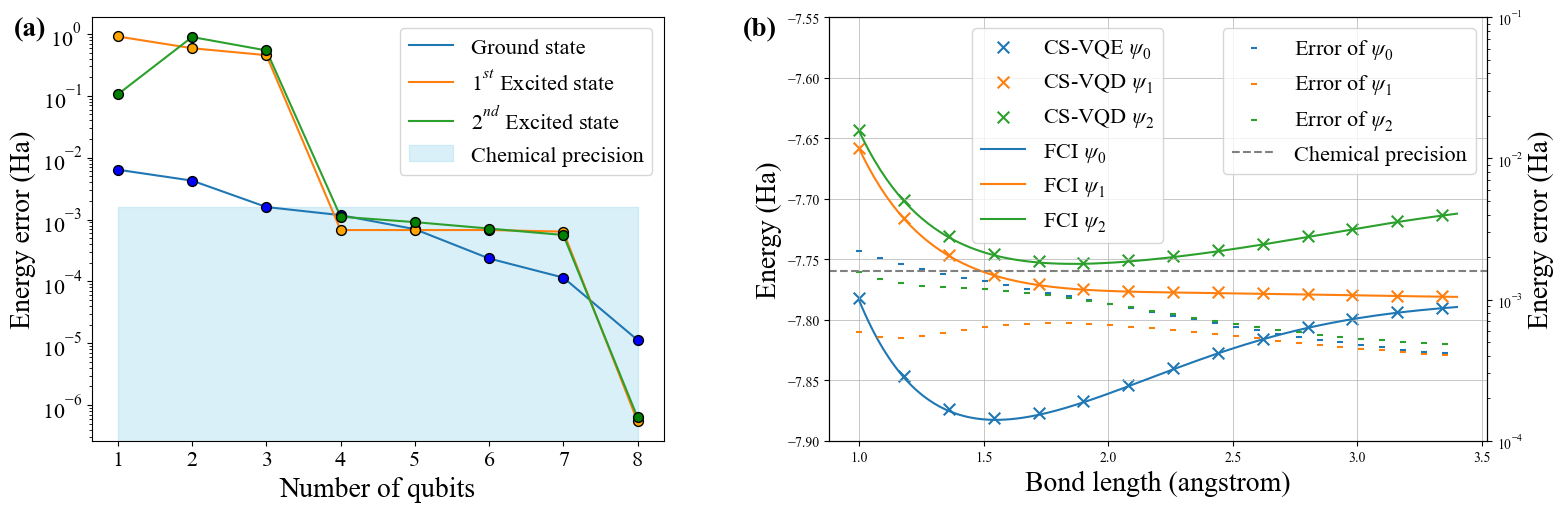

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Times New Roman'
rcParams['mathtext.it'] = 'Times New Roman:italic'
rcParams['mathtext.bf'] = 'Times New Roman:bold'

label_fontsize = 20
legend_fontsize = 16
tick_fontsize = 16

def plot_qubti_range(ax, qubits, errors, title):
    ax.plot(qubits, errors[0], label='Ground state')
    ax.plot(qubits, errors[1], label=r'$1^{st}$ Excited state')
    ax.plot(qubits, errors[2], label=r'$2^{nd}$ Excited state')
    ax.scatter(qubits, errors[0], color='blue', s=50, zorder=5, edgecolor='black')
    ax.scatter(qubits, errors[1], color='orange', s=50, zorder=5, edgecolor='black')
    ax.scatter(qubits, errors[2], color='green', s=50, zorder=5, edgecolor='black')
    ax.fill_between(qubits, 0, 0.0016, color='skyblue', alpha=0.3, label='Chemical precision')
    ax.set_yscale('log')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(loc='upper right', fontsize=legend_fontsize)
    ax.set_xlabel('Number of qubits', fontsize=label_fontsize)
    ax.set_ylabel('Energy error (Ha)', fontsize=label_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)  

energy_step = 15
error_step = 7
size_1 = 15
energy_marker = 'x';energy_marker_size = 70
error_marker = '_';error_marker_size = 20
def plot_PES(ax, bondlengths, energies, fcis, errors, ax_twin_ylim):
    ax.scatter(bondlengths[::energy_step], energies[0][::energy_step], label=r'CS-VQE $\psi_0$', marker=energy_marker, s=energy_marker_size)
    ax.scatter(bondlengths[::energy_step], energies[1][::energy_step], label=r'CS-VQD $\psi_1$', marker=energy_marker, s=energy_marker_size)
    ax.scatter(bondlengths[::energy_step], energies[2][::energy_step], label=r'CS-VQD $\psi_2$', marker=energy_marker, s=energy_marker_size)
    ax.plot(bondlengths, fcis[0], label=r'FCI $\psi_0$')
    ax.plot(bondlengths, fcis[1], label=r'FCI $\psi_1$')
    ax.plot(bondlengths, fcis[2], label=r'FCI $\psi_2$')
    ax_twin = ax.twinx()
    ax_twin.scatter(bondlengths[::error_step], errors[0][::error_step], label=r'Error of $\psi_0$', marker=error_marker, s=error_marker_size)
    ax_twin.scatter(bondlengths[::error_step], errors[1][::error_step], label=r'Error of $\psi_1$', marker=error_marker, s=error_marker_size)
    ax_twin.scatter(bondlengths[::error_step], errors[2][::error_step], label=r'Error of $\psi_2$', marker=error_marker, s=error_marker_size)
    ax_twin.set_ylim(ax_twin_ylim[0], ax_twin_ylim[1])
    ax_twin.set_yscale('log')
    ax_twin.axhline(y=0.0016, color='grey', linestyle='--', label='Chemical precision')
    ax.legend(loc='upper left', fontsize=legend_fontsize, bbox_to_anchor=(0.20, 1))
    ax.grid(which='both', axis='both', linestyle='-', linewidth=0.5)
    ax_twin.legend(loc='upper right', fontsize=legend_fontsize)
    ax.set_xlabel('Bond length (angstrom)', fontsize=label_fontsize)
    ax.set_ylabel('Energy (Ha)', fontsize=label_fontsize)
    ax_twin.set_ylabel('Energy error (Ha)', fontsize=label_fontsize)


from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(18, 5.5))
gs = GridSpec(1, 2, width_ratios=[1, 1.15],wspace=0.27)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

max_qubits = 8
qubits = list(range(1, max_qubits + 1))
plot_qubti_range(ax1, qubits, LiH_errors, r'$LiH$')
plot_PES(ax2, LiH_PES_bondlengths, LiH_PES_energies, LiH_PES_fcis, LiH_PES_errors, [1e-4, 1e-1])
ax2.set_ylim(-7.9, -7.55)

ax1.text(-0.08, 1., '(a)', transform=ax1.transAxes, fontsize=label_fontsize, fontweight='bold', va='top', ha='right')
ax2.text(-0.08, 1., '(b)', transform=ax2.transAxes, fontsize=label_fontsize, fontweight='bold', va='top', ha='right')